In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture


In [82]:
hotels=pd.read_csv("hotels.csv")
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [104]:
hotels.userCode.nunique()

1310

In [84]:
hotels.place.unique()

array(['Florianopolis (SC)', 'Salvador (BH)', 'Natal (RN)',
       'Aracaju (SE)', 'Recife (PE)', 'Sao Paulo (SP)',
       'Campo Grande (MS)', 'Rio de Janeiro (RJ)', 'Brasilia (DF)'],
      dtype=object)

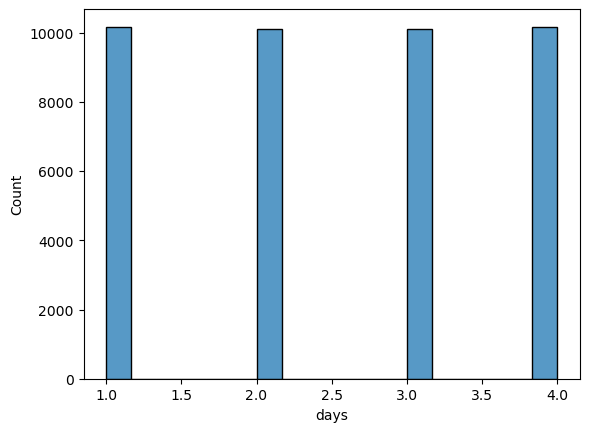

In [85]:
sns.histplot(hotels.days)
plt.show()

C:\Users\KhokharS\AppData\Local\Temp\ipykernel_8640\3804396915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=hotels.total)


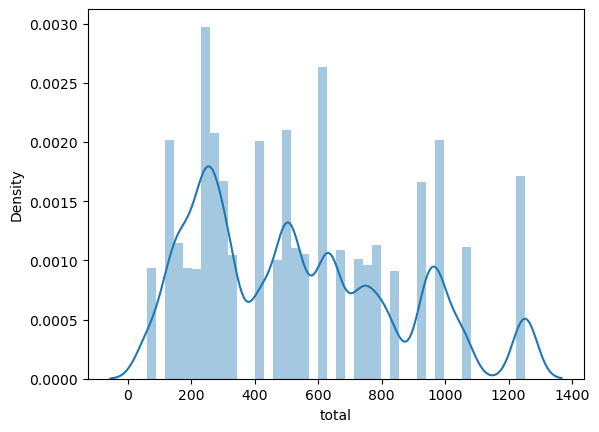

In [86]:
sns.distplot(a=hotels.total)
plt.show()

In [87]:
hotels.date=pd.to_datetime(hotels.date)

In [88]:
Avg_days = hotels.groupby('date')['days'].mean().reset_index()
Avg_days

,date,days
0,2019-09-26,2.430052
1,2019-10-03,2.539604
2,2019-10-10,2.455013
3,2019-10-17,2.505128
4,2019-10-24,2.588529
...,...,...
194,2023-06-15,2.750000
195,2023-06-22,2.727273
196,2023-06-29,2.500000
197,2023-07-06,2.000000


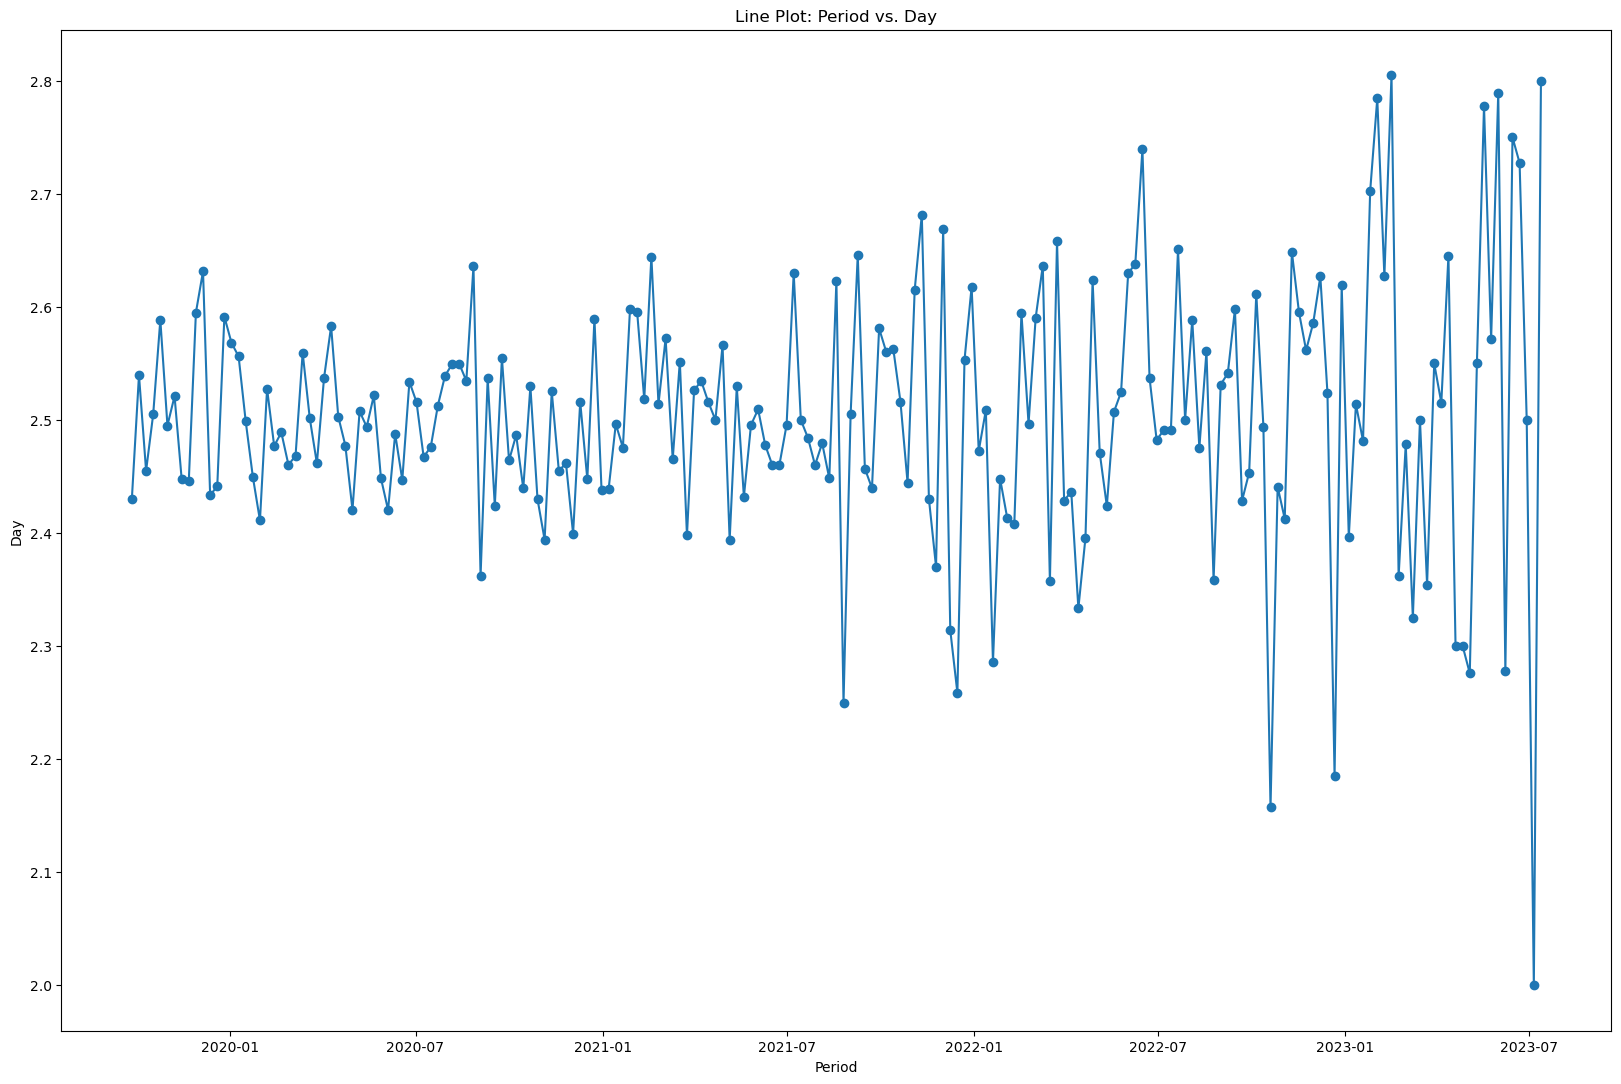

In [89]:
plt.figure(figsize=(20, 13))
plt.plot(Avg_days.date, Avg_days.days, marker='o')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Day')
plt.title('Line Plot: Period vs. Day')

# Display the plot
plt.show()


In [90]:
Avg_Spend=hotels.groupby("date")["total"].mean().reset_index()

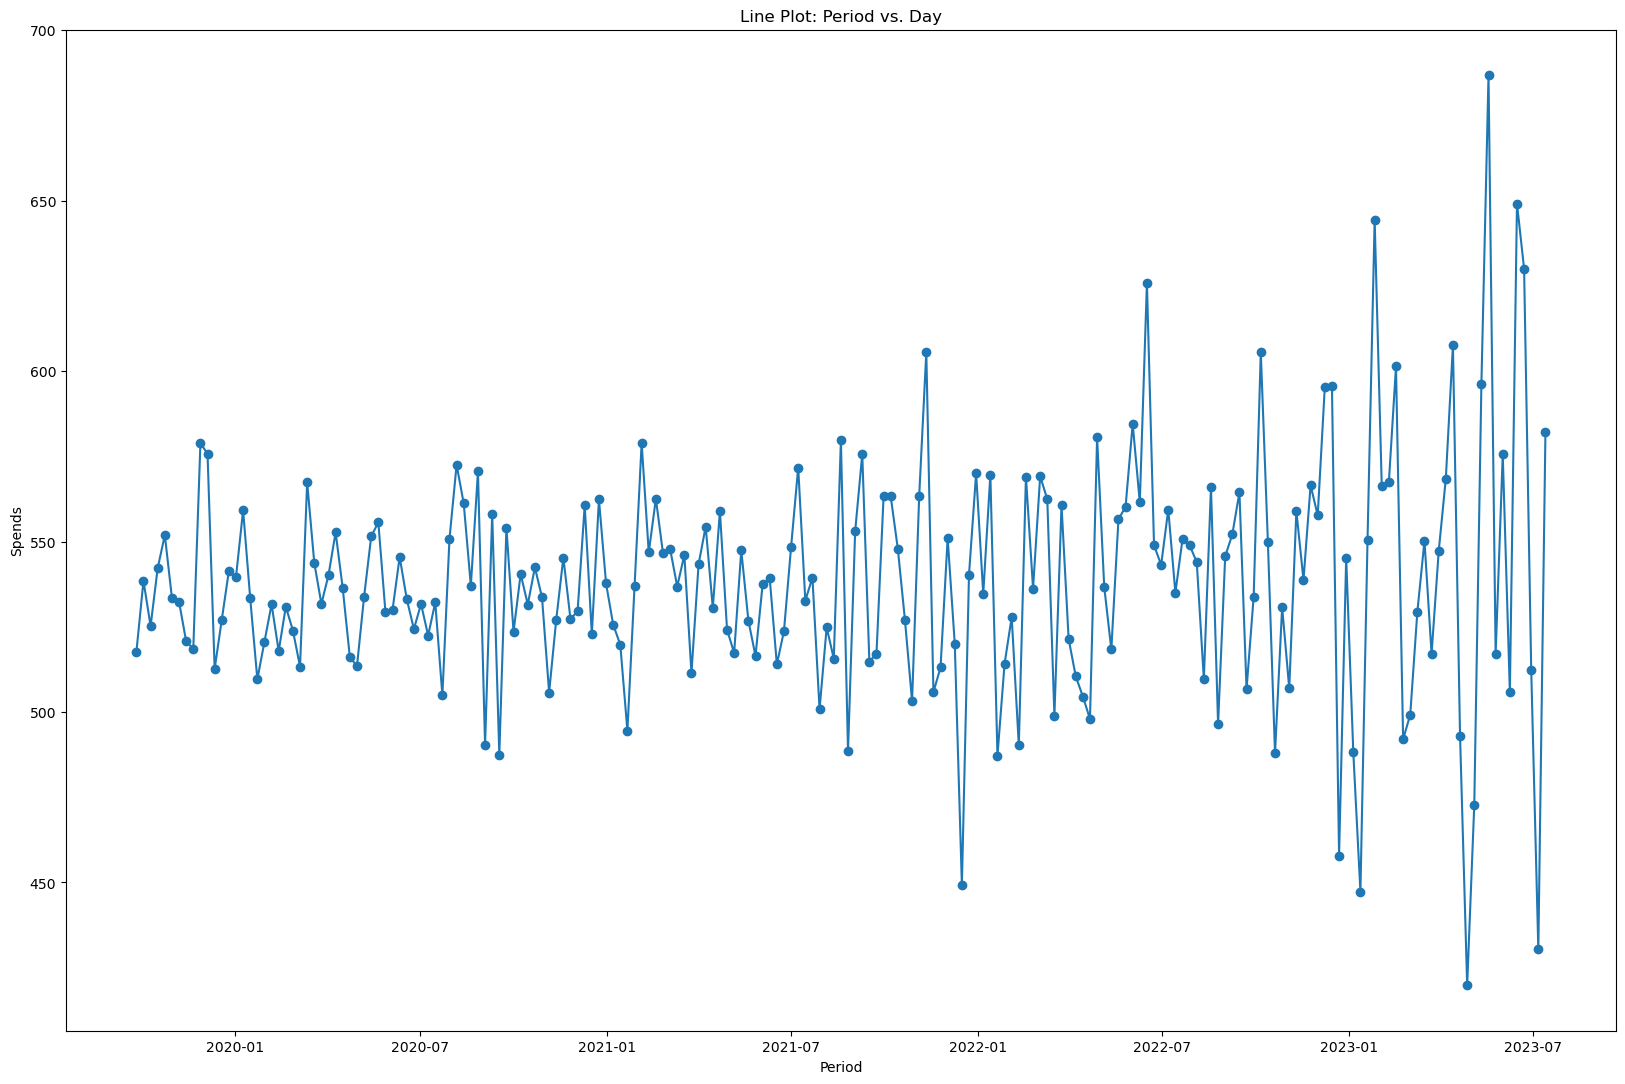

In [91]:
plt.figure(figsize=(20, 13))
plt.plot(Avg_Spend.date, Avg_Spend.total, marker='o')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Spends')
plt.title('Line Plot: Period vs. Day')

# Display the plot
plt.show()


In [92]:
user_data=hotels.groupby("userCode").agg({"days":"mean",
                                         "total":"mean"}).reset_index()

In [93]:
user_data

,userCode,days,total
0,0,2.629630,593.145185
1,1,1.000000,193.360000
2,2,2.694444,558.003333
3,3,2.300000,499.568500
4,4,2.571429,565.316071
...,...,...,...
1305,1335,2.416667,503.642333
1306,1336,2.000000,495.240000
1307,1337,2.818182,663.990909
1308,1338,4.000000,990.480000


C:\Users\KhokharS\AppData\Local\Temp\ipykernel_8640\2676141427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=user_data.total)


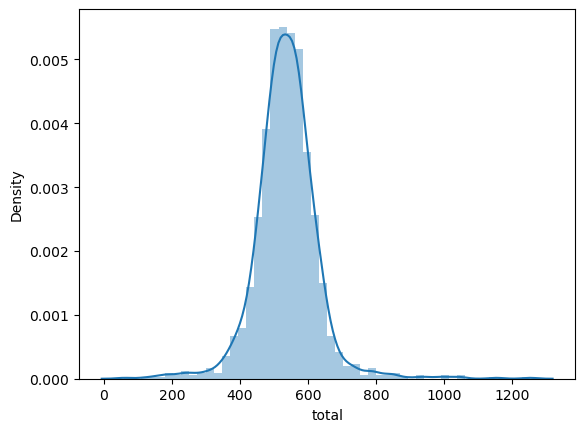

In [94]:
sns.distplot(a=user_data.total)
plt.show()

In [102]:
# Define the commission rate range (15% to 22%)
commission_min = 0.15
commission_max = 0.22

# Perform linear regression to estimate the commission rate
X = sm.add_constant(hotels[['total']])
y = hotels['price']  # Calculate the total price as a proxy for commission rate

model = sm.OLS(y, X)
results = model.fit()

# Get the predicted commission rate values
predicted_commission_rate = results.predict(X)

# Normalize the predicted commission rate between the defined range
min_predicted_commission_rate = min(predicted_commission_rate)
max_predicted_commission_rate = max(predicted_commission_rate)

normalized_commission_rate = ((predicted_commission_rate - min_predicted_commission_rate) / 
                              (max_predicted_commission_rate - min_predicted_commission_rate) *
                              (commission_max - commission_min) +
                              commission_min)

normalized_commission_rate = normalized_commission_rate.round(2)

# Add the commission_rate column to the hotels DataFrame
hotels['commission_rate'] = normalized_commission_rate

# Display the updated DataFrame
hotels


,travelCode,userCode,name,place,days,price,total,date,commission_rate
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26,0.22
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10,0.18
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14,0.19
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,2019-12-12,0.21
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,2019-12-26,0.16
...,...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,2020-06-18,0.19
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,2020-06-25,0.16
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-02,0.16
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-09,0.16


In [103]:
hotels.corr()

C:\Users\KhokharS\AppData\Local\Temp\ipykernel_8640\946668634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hotels.corr()


,travelCode,userCode,days,price,total,commission_rate
travelCode,1.000000,0.999895,-0.004046,-0.047629,-0.032243,-0.026708
userCode,0.999895,1.000000,-0.004049,-0.048607,-0.032826,-0.027253
days,-0.004046,-0.004049,1.000000,0.002321,0.752850,0.774650
price,-0.047629,-0.048607,0.002321,1.000000,0.602730,0.555615
total,-0.032243,-0.032826,0.752850,0.602730,1.000000,0.987419
commission_rate,-0.026708,-0.027253,0.774650,0.555615,0.987419,1.000000


C:\Users\KhokharS\AppData\Local\Temp\ipykernel_8640\3217584700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=hotels.commission_rate)


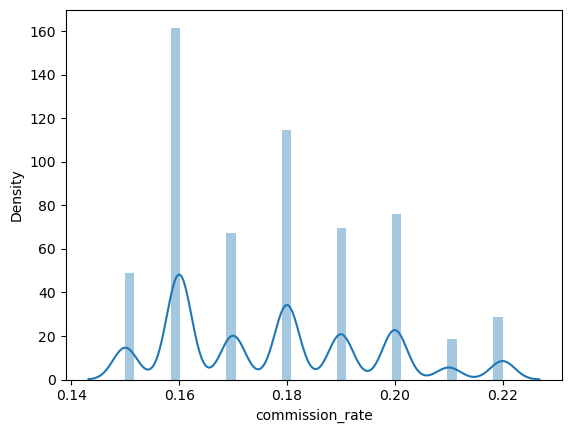

In [97]:
sns.distplot(a=hotels.commission_rate)
plt.show()

In [98]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   travelCode       40552 non-null  int64         
 1   userCode         40552 non-null  int64         
 2   name             40552 non-null  object        
 3   place            40552 non-null  object        
 4   days             40552 non-null  int64         
 5   price            40552 non-null  float64       
 6   total            40552 non-null  float64       
 7   date             40552 non-null  datetime64[ns]
 8   commission_rate  40552 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 2.8+ MB


In [105]:
data = hotels.copy()
data["revenue"]=data.total*data.commission_rate
data

,travelCode,userCode,name,place,days,price,total,date,commission_rate,revenue
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26,0.22,275.4576
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10,0.18,94.8276
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14,0.19,150.1437
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,2019-12-12,0.21,221.2644
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,2019-12-26,0.16,50.0832
...,...,...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,2020-06-18,0.19,141.1434
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,2020-06-25,0.16,39.6192
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-02,0.16,28.9872
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-09,0.16,28.9872


         count  days   price        total     revenue
cluster                                              
0        19636     3  213.50   564.873852  103.057728
1        13429     1  176.18   205.791282   32.653185
2         7487     4  282.84  1053.792592  219.164178


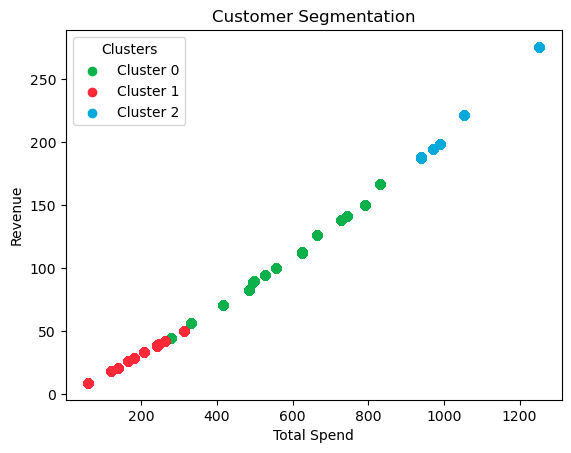

In [118]:
# Select relevant columns for analysis
selected_cols = ['userCode', 'place', 'days', 'price', 'total', 'revenue',"date"]
data = data[selected_cols]

# Perform data preprocessing (if required) - handle missing values, convert data types, etc.

# Ensure non-negative values
data[['days', 'price', 'total', 'revenue']] = data[['days', 'price', 'total', 'revenue']].abs()

# Convert 'days' and 'price' columns to integers
data[['days']] = data[['days']].astype(int)

# Perform customer segmentation using Gaussian Mixture Models
num_clusters = 3  # Define the number of clusters
gmm = GaussianMixture(n_components=num_clusters, random_state=42)

# Fit the model and get cluster assignments
cluster_assignments = gmm.fit_predict(data[['days', 'price', 'total', 'revenue']])

# Add the cluster assignments to the data
data['cluster'] = cluster_assignments

# Analyze the clusters
cluster_stats = data.groupby('cluster').agg({'userCode': 'count', 'days': 'mean', 'price': 'mean', 'total': 'mean', 'revenue': 'mean'}).rename(columns={'userCode': 'count'})
cluster_stats['days'] = cluster_stats['days'].round().astype(int)  # Round 'days' values to integers
cluster_stats['price'] = cluster_stats['price'].round(2)  # Round 'price' values to two decimal places
print(cluster_stats)

# Visualize the clusters
fig, ax = plt.subplots()

# Define colors for the clusters
cluster_colors = ['#0DB14B', '#FF2938', '#00A9DC']

for cluster_label in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_label]
    ax.scatter(cluster_data['total'], cluster_data['revenue'], label=f'Cluster {cluster_label}', c=cluster_colors[cluster_label])

plt.xlabel('Total Spend')
plt.ylabel('Revenue')
plt.title('Customer Segmentation')

# Create a legend
legend_labels = ['Cluster {}'.format(i) for i in range(num_clusters)]
ax.legend(title='Clusters', labels=legend_labels)

plt.show()


In [119]:
cluster_stats

,count,days,price,total,revenue
cluster,,,,,
0,19636,3,213.50,564.873852,103.057728
1,13429,1,176.18,205.791282,32.653185
2,7487,4,282.84,1053.792592,219.164178


C:\Users\KhokharS\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         count  days   price        total     revenue
cluster                                              
0        14968     3  229.75   628.552127  116.289304
1        18097     2  172.36   245.746026   39.869750
2         7487     4  282.84  1053.792592  219.164178


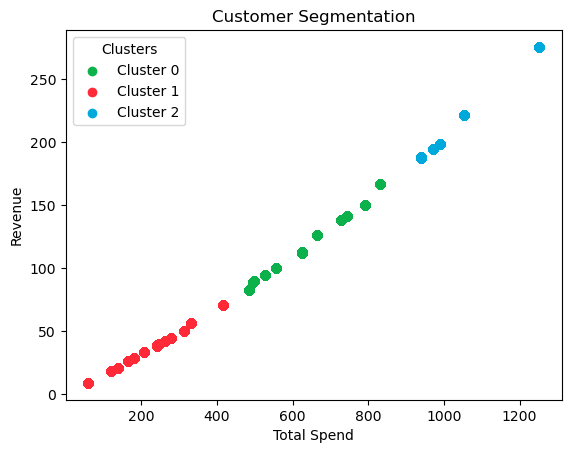

In [120]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data into a DataFrame
# df = pd.read_csv('hotel_booking_data.csv')

# Select relevant columns for analysis
selected_cols = ['userCode', 'place', 'days', 'price', 'total', 'revenue','date']
data = data[selected_cols]

# Perform data preprocessing (if required) - handle missing values, convert data types, etc.

# Ensure non-negative values
data[['days', 'price', 'total', 'revenue']] = data[['days', 'price', 'total', 'revenue']].abs()

# Convert 'days' and 'price' columns to integers
data[['days', 'price']] = data[['days', 'price']].astype(int)

# Perform customer segmentation using K-means clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model and get cluster assignments
cluster_assignments = kmeans.fit_predict(data[['days', 'price', 'total', 'revenue']])

# Add the cluster assignments to the data
data['cluster'] = cluster_assignments

# Analyze the clusters
cluster_stats = data.groupby('cluster').agg({'userCode': 'count', 'days': 'mean', 'price': 'mean', 'total': 'mean', 'revenue': 'mean'}).rename(columns={'userCode': 'count'})
cluster_stats['days'] = cluster_stats['days'].round().astype(int)  # Round 'days' values to integers
cluster_stats['price'] = cluster_stats['price'].round(2)  # Round 'price' values to two decimal places
print(cluster_stats)

# Visualize the clusters
fig, ax = plt.subplots()

# Define colors for the clusters
cluster_colors = ['#0DB14B', '#FF2938', '#00A9DC']

for cluster_label in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_label]
    ax.scatter(cluster_data['total'], cluster_data['revenue'], label=f'Cluster {cluster_label}', c=cluster_colors[cluster_label])

plt.xlabel('Total Spend')
plt.ylabel('Revenue')
plt.title('Customer Segmentation')

# Create a legend
legend_labels = ['Cluster {}'.format(i) for i in range(num_clusters)]
ax.legend(title='Clusters', labels=legend_labels)

plt.show()


In [121]:
cluster_stats

,count,days,price,total,revenue
cluster,,,,,
0,14968,3,229.75,628.552127,116.289304
1,18097,2,172.36,245.746026,39.869750
2,7487,4,282.84,1053.792592,219.164178


In [117]:
cluster_data

,userCode,place,days,price,total,revenue,date,cluster
1,0,Salvador (BH),2,263,526.82,94.8276,2019-10-10,3
5,0,Natal (RN),2,242,485.76,82.5792,2020-01-09,3
6,0,Aracaju (SE),2,208,416.08,70.7336,2020-02-27,3
10,0,Sao Paulo (SP),3,139,417.30,70.9410,2020-05-21,3
11,0,Natal (RN),2,242,485.76,82.5792,2020-06-18,3
...,...,...,...,...,...,...,...,...
40529,1337,Salvador (BH),2,263,526.82,94.8276,2019-10-17,3
40534,1337,Sao Paulo (SP),4,139,556.40,100.1520,2020-03-05,3
40536,1337,Aracaju (SE),2,208,416.08,70.7336,2020-04-02,3
40539,1339,Salvador (BH),2,263,526.82,94.8276,2019-10-17,3


In [56]:
import scipy.stats as stats

# Perform ANOVA for each variable
variables = ['days', 'price', 'total', 'revenue']
anova_results = {}

for variable in variables:
    anova_result = stats.f_oneway(*[data[data['cluster'] == i][variable] for i in range(num_clusters)])
    anova_results[variable] = anova_result

# Print ANOVA results
for variable, result in anova_results.items():
    print(f"ANOVA for {variable}:")
    print(f"  F-value: {result.statistic:.2f}")
    print(f"  p-value: {result.pvalue:.4f}\n")

# Interpret ANOVA results
alpha = 0.05

for variable, result in anova_results.items():
    if result.pvalue < alpha:
        print(f"The mean values of '{variable}' differ significantly among the clusters.\n")
    else:
        print(f"The mean values of '{variable}' do not differ significantly among the clusters.\n")


ANOVA for days:
  F-value: 20550.14
  p-value: 0.0000

ANOVA for price:
  F-value: 8519.57
  p-value: 0.0000

ANOVA for total:
  F-value: 156253.76
  p-value: 0.0000

ANOVA for revenue:
  F-value: 148052.92
  p-value: 0.0000

The mean values of 'days' differ significantly among the clusters.

The mean values of 'price' differ significantly among the clusters.

The mean values of 'total' differ significantly among the clusters.

The mean values of 'revenue' differ significantly among the clusters.



In [57]:
ticket_classification = {
    0: 'Medium Ticket',
    1: 'Low Ticket',
    2: 'High Ticket'
}

# Add the "Ticket Classification" column based on the values in the "cluster" column
data['Ticket_Classification'] = data['cluster'].map(ticket_classification)

In [58]:
data

,userCode,place,days,price,total,revenue,date,cluster,Ticket_Classification
0,0,Florianopolis (SC),4,313,1252.08,275.4576,2019-09-26,2,High Ticket
1,0,Salvador (BH),2,263,526.82,94.8276,2019-10-10,0,Medium Ticket
2,0,Salvador (BH),3,263,790.23,150.1437,2019-11-14,0,Medium Ticket
3,0,Salvador (BH),4,263,1053.64,221.2644,2019-12-12,2,High Ticket
4,0,Florianopolis (SC),1,313,313.02,50.0832,2019-12-26,1,Low Ticket
...,...,...,...,...,...,...,...,...,...
40547,1339,Brasilia (DF),3,247,742.86,141.1434,2020-06-18,0,Medium Ticket
40548,1339,Brasilia (DF),1,247,247.62,39.6192,2020-06-25,1,Low Ticket
40549,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-02,1,Low Ticket
40550,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-09,1,Low Ticket


In [59]:
preferences = {}

# Group the data by userCode
groups = data.groupby('userCode')

# Assign preferences based on priority order
for _, group in groups:
    preferences_set = list(group["Ticket_Classification"])
    for _, row in group.iterrows():
        ticket = row['Ticket_Classification']
        if 'High Ticket' in preferences_set:
            preferences[row['userCode']] = 'High Ticket'
#             preferences_set.remove('High Ticket')
        elif 'Medium Ticket' in preferences_set:
            preferences[row['userCode']] = 'Medium Ticket'
#             preferences_set.remove('Medium Ticket')
        else:
            preferences[row['userCode']] = 'Low Ticket'
# Assign preferences to the DataFrame
data['Preference'] = data['userCode'].map(preferences)
data

,userCode,place,days,price,total,revenue,date,cluster,Ticket_Classification,Preference
0,0,Florianopolis (SC),4,313,1252.08,275.4576,2019-09-26,2,High Ticket,High Ticket
1,0,Salvador (BH),2,263,526.82,94.8276,2019-10-10,0,Medium Ticket,High Ticket
2,0,Salvador (BH),3,263,790.23,150.1437,2019-11-14,0,Medium Ticket,High Ticket
3,0,Salvador (BH),4,263,1053.64,221.2644,2019-12-12,2,High Ticket,High Ticket
4,0,Florianopolis (SC),1,313,313.02,50.0832,2019-12-26,1,Low Ticket,High Ticket
...,...,...,...,...,...,...,...,...,...,...
40547,1339,Brasilia (DF),3,247,742.86,141.1434,2020-06-18,0,Medium Ticket,High Ticket
40548,1339,Brasilia (DF),1,247,247.62,39.6192,2020-06-25,1,Low Ticket,High Ticket
40549,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-02,1,Low Ticket,High Ticket
40550,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-09,1,Low Ticket,High Ticket


In [60]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of customer classification and ticket preference
contingency_table = pd.crosstab(data['Ticket_Classification'], data['Preference'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant association between customer classification and ticket preference.")
else:
    print("There is no significant association between customer classification and ticket preference.")


Chi-square test results:
Chi-square statistic: 160.94765161538632
P-value: 9.155448504451003e-34
There is a significant association between customer classification and ticket preference.


In [61]:
data.groupby('Preference')["userCode"].nunique()

Preference
High Ticket      1214
Low Ticket         17
Medium Ticket      79
Name: userCode, dtype: int64

In [62]:
hotels['year'] = pd.to_datetime(hotels['date']).dt.year
user_count_yearwise = hotels.groupby(['userCode', 'year']).size().unstack(fill_value=0)
user_count_yearwise

year,2019,2020,2021,2022,2023
userCode,,,,,
0,5,18,4,0,0
1,2,0,0,0,0
2,4,15,12,5,0
3,4,16,14,12,14
4,3,14,13,18,8
...,...,...,...,...,...
1335,6,11,14,20,9
1336,1,0,0,0,0
1337,4,7,0,0,0


In [63]:
hotels.groupby(['userCode', 'year']).size()

userCode  year
0         2019     5
          2020    18
          2021     4
1         2019     2
2         2019     4
                  ..
1337      2019     4
          2020     7
1338      2019     1
1339      2019     3
          2020    10
Length: 4140, dtype: int64

In [64]:
customer_classification = []

for user_code, row in user_count_yearwise.iterrows():
    if (row==0).sum() == 0:
        customer_classification.append('Regular')
    elif row.iloc[-2:].sum() == 0:
        customer_classification.append('Disconnected')
    else:
        customer_classification.append('Potential Regular')

# Add the customer classification to the DataFrame
user_count_yearwise['Classification'] = customer_classification

user_count_yearwise=user_count_yearwise.reset_index()

In [65]:
user_count_yearwise.groupby("Classification")["userCode"].count()

Classification
Disconnected         764
Potential Regular    352
Regular              194
Name: userCode, dtype: int64

In [66]:
user_count_yearwise.reset_index()

year,index,userCode,2019,2020,2021,2022,2023,Classification
0,0,0,5,18,4,0,0,Disconnected
1,1,1,2,0,0,0,0,Disconnected
2,2,2,4,15,12,5,0,Potential Regular
3,3,3,4,16,14,12,14,Regular
4,4,4,3,14,13,18,8,Regular
...,...,...,...,...,...,...,...,...
1305,1305,1335,6,11,14,20,9,Regular
1306,1306,1336,1,0,0,0,0,Disconnected
1307,1307,1337,4,7,0,0,0,Disconnected
1308,1308,1338,1,0,0,0,0,Disconnected


In [67]:
user_Classification=data.merge(user_count_yearwise, on='userCode', how='left')
user_Classification

,userCode,place,days,price,total,revenue,date,cluster,Ticket_Classification,Preference,2019,2020,2021,2022,2023,Classification
0,0,Florianopolis (SC),4,313,1252.08,275.4576,2019-09-26,2,High Ticket,High Ticket,5,18,4,0,0,Disconnected
1,0,Salvador (BH),2,263,526.82,94.8276,2019-10-10,0,Medium Ticket,High Ticket,5,18,4,0,0,Disconnected
2,0,Salvador (BH),3,263,790.23,150.1437,2019-11-14,0,Medium Ticket,High Ticket,5,18,4,0,0,Disconnected
3,0,Salvador (BH),4,263,1053.64,221.2644,2019-12-12,2,High Ticket,High Ticket,5,18,4,0,0,Disconnected
4,0,Florianopolis (SC),1,313,313.02,50.0832,2019-12-26,1,Low Ticket,High Ticket,5,18,4,0,0,Disconnected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40547,1339,Brasilia (DF),3,247,742.86,141.1434,2020-06-18,0,Medium Ticket,High Ticket,3,10,0,0,0,Disconnected
40548,1339,Brasilia (DF),1,247,247.62,39.6192,2020-06-25,1,Low Ticket,High Ticket,3,10,0,0,0,Disconnected
40549,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-02,1,Low Ticket,High Ticket,3,10,0,0,0,Disconnected
40550,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-09,1,Low Ticket,High Ticket,3,10,0,0,0,Disconnected


In [68]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a new column for year based on the 'date' column
user_Classification['year'] = pd.to_datetime(hotels['date']).dt.year

# Create a contingency table of customer classification and year
contingency_table = pd.crosstab(user_Classification['Classification'], user_Classification['year'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There are significant differences in customer classifications based on the available date.")
else:
    print("There are no significant differences in customer classifications based on the available date.")


Chi-square test results:
Chi-square statistic: 9480.51948248235
P-value: 0.0
There are significant differences in customer classifications based on the available date.


In [69]:
user_Classification.drop(["Ticket_Classification",2019,2020,2021,2022,2023],axis=1)

,userCode,place,days,price,total,revenue,date,cluster,Preference,Classification,year
0,0,Florianopolis (SC),4,313,1252.08,275.4576,2019-09-26,2,High Ticket,Disconnected,2019
1,0,Salvador (BH),2,263,526.82,94.8276,2019-10-10,0,High Ticket,Disconnected,2019
2,0,Salvador (BH),3,263,790.23,150.1437,2019-11-14,0,High Ticket,Disconnected,2019
3,0,Salvador (BH),4,263,1053.64,221.2644,2019-12-12,2,High Ticket,Disconnected,2019
4,0,Florianopolis (SC),1,313,313.02,50.0832,2019-12-26,1,High Ticket,Disconnected,2019
...,...,...,...,...,...,...,...,...,...,...,...
40547,1339,Brasilia (DF),3,247,742.86,141.1434,2020-06-18,0,High Ticket,Disconnected,2020
40548,1339,Brasilia (DF),1,247,247.62,39.6192,2020-06-25,1,High Ticket,Disconnected,2020
40549,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-02,1,High Ticket,Disconnected,2020
40550,1339,Campo Grande (MS),3,60,181.17,28.9872,2020-07-09,1,High Ticket,Disconnected,2020


In [70]:
user_Classification.groupby(["Ticket_Classification"])["userCode"].nunique().reset_index()

,Ticket_Classification,userCode
0,High Ticket,1214
1,Low Ticket,1276
2,Medium Ticket,1278


In [72]:
user_Classification.groupby(["Classification"])["userCode"].nunique().reset_index()

,Classification,userCode
0,Disconnected,764
1,Potential Regular,352
2,Regular,194


In [37]:
Final_Classification=user_Classification.groupby(["Classification","Preference"])["userCode"].nunique().reset_index()
Final_Classification

,Classification,Preference,userCode
0,Disconnected,High Ticket,668
1,Disconnected,Low Ticket,17
2,Disconnected,Medium Ticket,79
3,Potential Regular,High Ticket,352
4,Regular,High Ticket,194


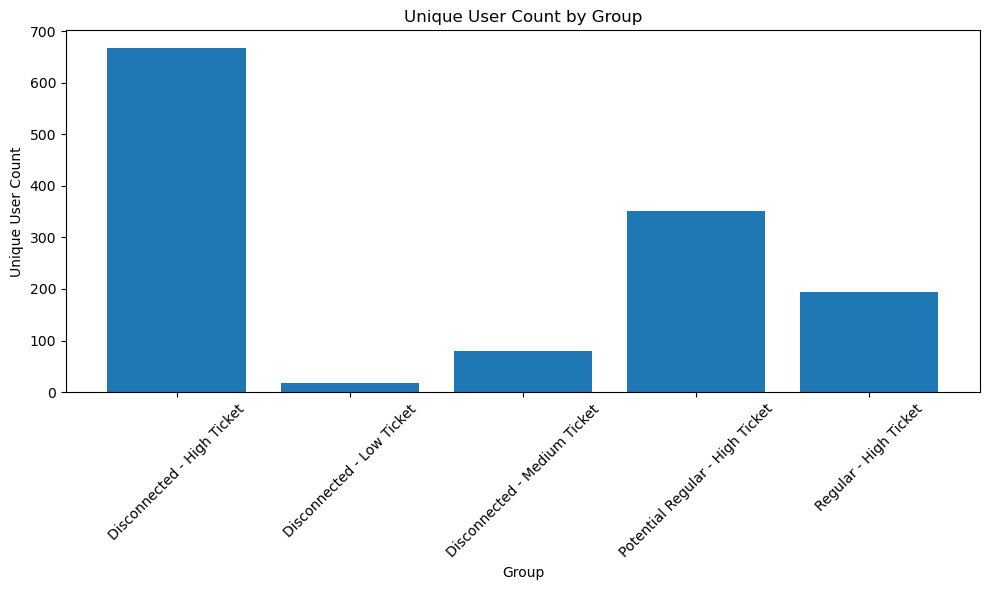

In [38]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(Final_Classification['Classification'] + ' - ' + Final_Classification['Preference'], Final_Classification['userCode'])
plt.xlabel('Group')
plt.ylabel('Unique User Count')
plt.title('Unique User Count by Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


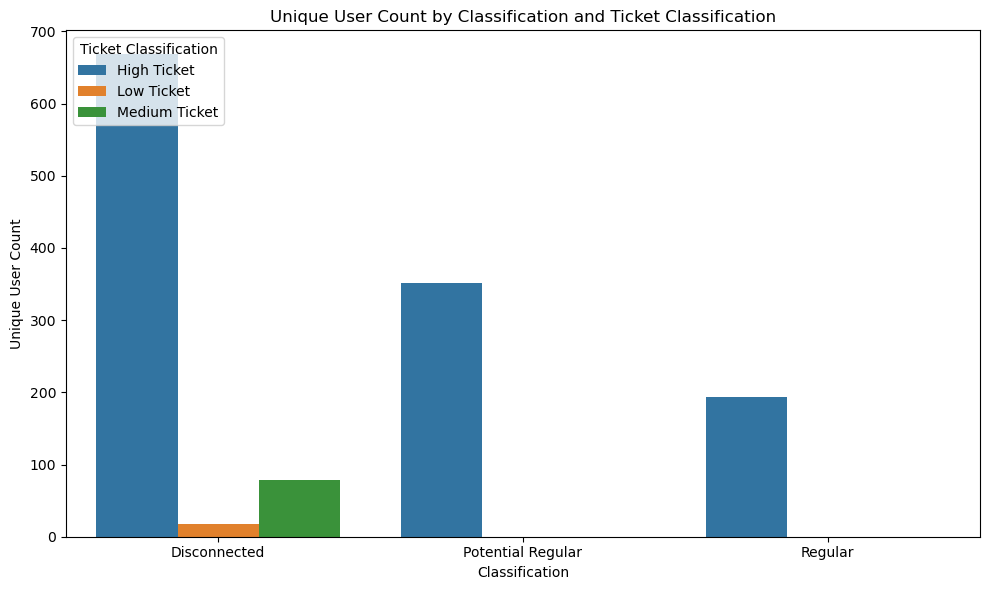

In [39]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Classification', y='userCode', hue='Preference', data=Final_Classification)
plt.xlabel('Classification')
plt.ylabel('Unique User Count')
plt.title('Unique User Count by Classification and Ticket Classification')
plt.legend(title='Ticket Classification')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

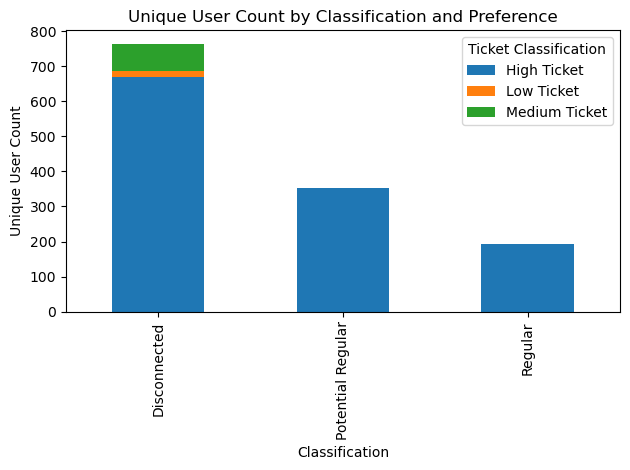

In [40]:
# Pivot the DataFrame for stacked bar chart
pivot_df = Final_Classification.pivot(index='Classification', columns='Preference', values='userCode')

# Plotting the data
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Classification')
plt.ylabel('Unique User Count')
plt.title('Unique User Count by Classification and Preference')
plt.legend(title='Ticket Classification')
plt.tight_layout()
plt.show()


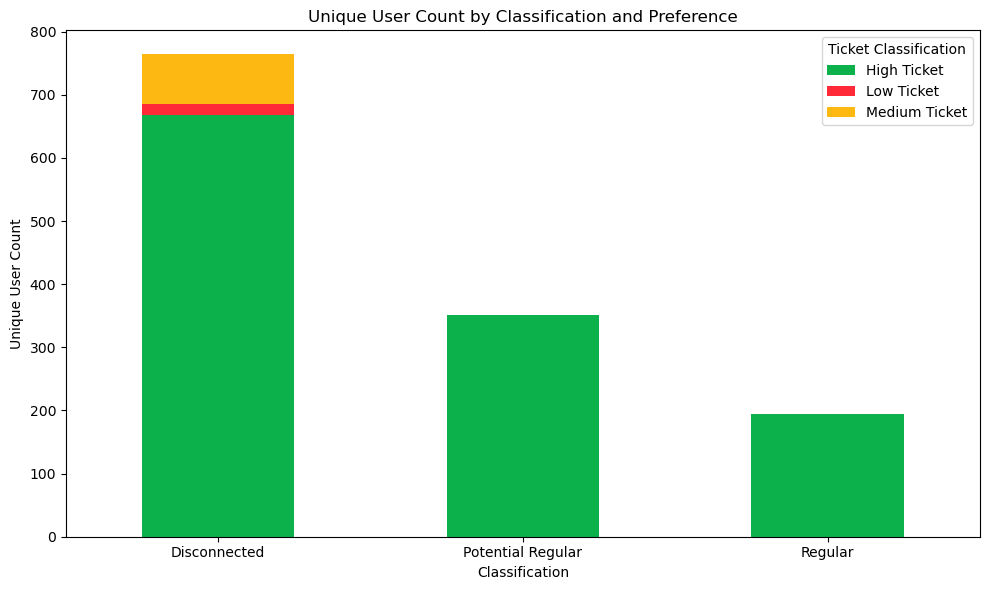

In [41]:
import matplotlib.pyplot as plt

# Pivot the DataFrame for stacked bar chart
pivot_df = Final_Classification.pivot(index='Classification', columns='Preference', values='userCode')

# Define the colors
colors = ['#0DB14B', '#FF2938', '#FDB812']

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size by adjusting the figsize parameter
pivot_df.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.xlabel('Classification')
plt.ylabel('Unique User Count')
plt.title('Unique User Count by Classification and Preference')
plt.legend(title='Ticket Classification')

# Set x-axis tick labels orientation to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
